# Demo

In [1]:
from cnd.ocr.predictor import Predictor
import pathlib
import numpy as np
import cv2
from matplotlib import pyplot as plt
from cnd.ocr.transforms import get_transforms_val

model_path = './models/best_model_colab_700.pth'
img_size = [32,96]

p = Predictor(model_path, img_size)
transforms = get_transforms_val(img_size)

In [2]:
path = './CropNumbers/'
dataset_paths = pathlib.Path(path) 

filepaths = list(dataset_paths.glob('**/*'))[4:]
filepaths = [file for file in filepaths if file.is_file()]
print(len(filepaths))
filepaths[:3]

5376


[PosixPath('CropNumbers/NumBase/X998AP 199.bmp'),
 PosixPath('CropNumbers/NumBase/A238XH 199.bmp'),
 PosixPath('CropNumbers/NumBase/T929PT 197.bmp')]

CropNumbers/NumBase/K695TA 05.bmp


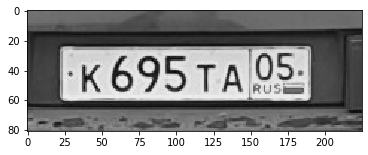

In [3]:
np.random.seed(42)
random_ind = np.random.randint(0,len(filepaths))
pic = cv2.imread(str(filepaths[random_ind]))
print(filepaths[random_ind])
plt.imshow(pic)

In [4]:
p.predict(pic)

'K695TA05'

# Metrics

In [5]:
import re

with open('experiments/logs/train_logs.txt') as f:
    logs = f.read().split('\n')

train_loss, val_loss, train_lev, val_lev = [], [], [], []

for item in logs:
    t_loss_reg = re.findall('train\_loss: .+\, train_str_accuracy', item)
    if len(t_loss_reg) == 1:
        loss = float(t_loss_reg[0].split()[1][:-1])
        train_loss.append(loss)
        
    v_loss_reg = re.findall('val\_loss: .+\, val_str_accuracy', item)
    if len(v_loss_reg) == 1:
        loss = float(v_loss_reg[0].split()[1][:-1])
        val_loss.append(loss)
        
    t_lev_reg = re.findall('train_str_levenshtein: \d\.\d{,4}', item)
    if len(t_lev_reg) == 1:
        lev = float(t_lev_reg[0].split()[1])
        train_lev.append(lev)
    
    v_lev_reg = re.findall('val_str_levenshtein: \d\.\d{,4}', item)
    if len(v_lev_reg) == 1:
        lev = float(v_lev_reg[0].split()[1])
        val_lev.append(lev)
    

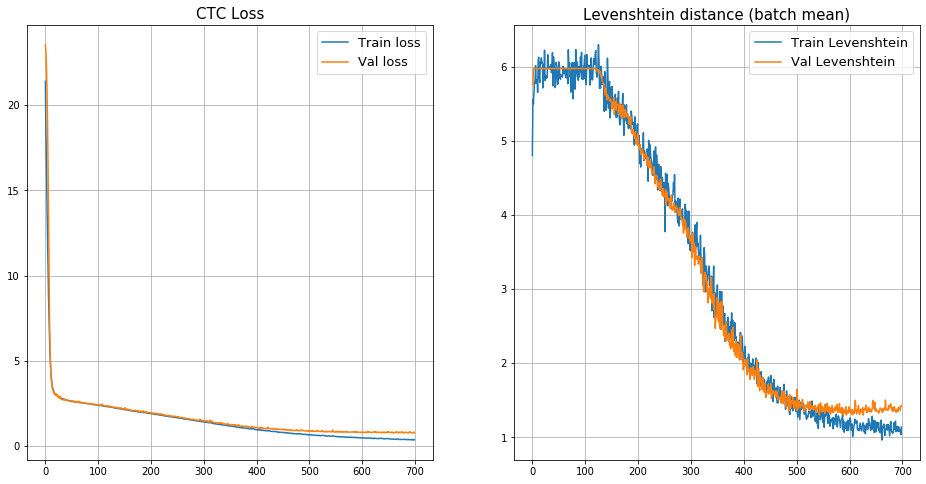

In [6]:
from matplotlib import pyplot as plt

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
ax1.plot(train_loss, label='Train loss')
ax1.plot(val_loss, label='Val loss')
ax1.set_title('CTC Loss', fontsize=15)
ax1.legend(fontsize=13)
ax1.grid()

ax2.plot(train_lev, label='Train Levenshtein')
ax2.plot(val_lev, label='Val Levenshtein')
ax2.set_title('Levenshtein distance (batch mean)', fontsize=15)
ax2.legend(fontsize=13)
ax2.grid()

